## Define belly regime for N' and N'' (increasing with depth)

$C(z)=C_0 + C'(z-z_0) + C''(z-z_0)^2$, where $N_0$ is the concentration at $z_0$. I will start with $z_0=H_s$, so $C_0$ is a reference concentration at shelf break depth.
   

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sympy as sym
import seaborn as sns
sym.init_printing() # enable fancy printing

/Users/Karina/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# Set appearance options seaborn
sns.set_style('white')
sns.set_context('notebook')

In [3]:
C1,C2,z,Co,Hs,tau,Z = sym.symbols('C1,C2,z,Co,Hs,tau, Z')
func = Co + C1*(z-Hs) + C2*((z-Hs)**2)


In [4]:
func

### What should be the value of $\hat{C''}$ to get maxima, minima or inflectio points within Hd? 

i.e. Profiles with 'bellies' (max, mins or inflection points)

There are bellies wherever 

$d\hat{C}/dz=\hat{C'}+2\hat{C''}(z-Hs)=0$. (1)

I want these points (I'll call them $z_{belly}$) to be within my profile ($0\le z \le Hd$), so I have the condition:

  $0 \le z_{belly} \le 400$ (2),

but solving (1) for $z_{belly}$ gives,

$z_{belly}=\frac{-\hat{C'}}{2\hat{C''}}+Hs$ (3). 

The inequalities (2) and (3) give:

(4) $\frac{\hat{C'}}{2Hs}\lt {\hat{C''}}$ and (5) $\frac{\hat{C'}}{2(Hs-Hd)}\gt {\hat{C''}}$, 

for a given $ 0\le\hat{C'}$ (since I want increasing profiles)

The region that satisfies conditions (4) and (5) is the triangle plotted below. Also, these hold for the dimensional parameters $C'$ and $C''$, where $  0 \le C'$





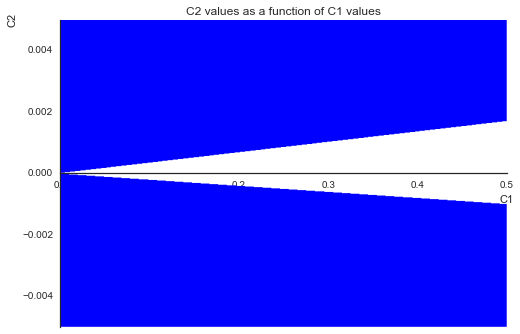

In [5]:
p2 = sym.plot_implicit(sym.Or(C1/(2*(147.5-400)) > C2,C1/(2*147.5) < C2),(C1,0,0.5),(C2,-0.005,0.005),
                      title='C2 values as a function of C1 values')


Let's see if it works...

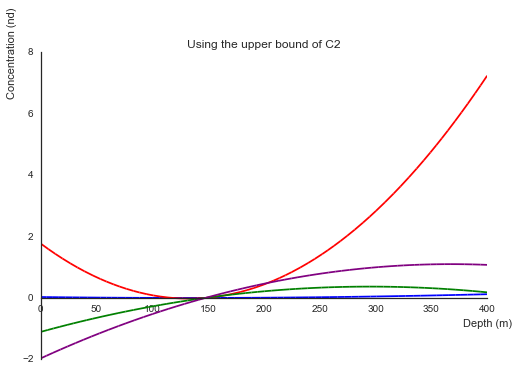

In [6]:
func = 0 + C1*(z-Hs) + C2*((z-Hs)**2)
hand = sym.plot(func.subs({C1:0.00005,Hs:147.5,C2:0.0005/(2*147.5)}),
               func.subs({C1:0.003,Hs:147.5,C2:0.03/(2*147.5)}),
               func.subs({C1:0.005,Hs:147.5,C2:-0.005/(2*147.5)}),
               func.subs({C1:0.01,Hs:147.5,C2:-0.0067/(2*147.5)}),(z, 0, 400),
               xlabel='Depth (m)',
               ylabel='Concentration (nd)',
               title='Using the upper bound of C2',
               show=False)
hand[1].line_color='r'
hand[2].line_color='g'
hand[3].line_color='purple'

hand.show()

## $\tau_v$ as a function of N' and N''

$$\frac{\tau}{Z}=\frac{\delta^2_vN}{\delta_vN}=Z\frac{\delta^2_vN}{\delta_vN}\rvert_{z=Hs}=\frac{2N''}{N'}$$

We have some bounds for N' and N'': we imposed $0\le N'$ and $N'/2Hs\gt N''$ and $N''\lt N'/(2(Hs-400))$ to have a profile with a max, min or inflection point above 400 m.

Using these bounds, we can now bound the values of \tau_v/Z:

$$\frac{\tau}{Z}=\frac{2N''}{N'} \gt \frac{2N'}{2HsN'} = \frac{1}{Hs}$$

and

$$\frac{\tau}{Z}=\frac{2N''}{N'} \lt \frac{2N'}{2N'(Hs-Hd)} = \frac{1}{(Hs-Hd)}$$

These bounds do not depend on N' or N'', only on Hs.

So,

$$ \frac{1}{Hs-Hd} \gt \frac{\tau}{Z} \gt \frac{1}{Hs}$$

Hs=0 and Hd are asymptotes, but that is fine. If Hs = 0 it means you don't even have a shelf and if Hs=400 m you probbaly care about not having bellies deeper than that, so 400 m wouldn't even be an asymptote in the first place.

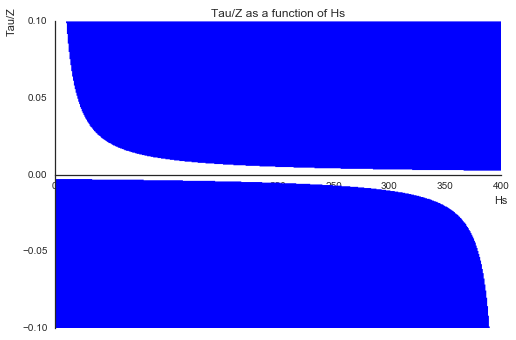

In [7]:
p2 = sym.plot_implicit(sym.Or(1/Hs < tau, 1/(Hs-400)> tau), (Hs, 0, 400),(tau,-0.1,0.1),
                      title='Tau/Z as a function of Hs',
                      ylabel='Tau/Z')


In the idealized bathymetry Hs=147.5 m, so the bounds are: $-0.004  \gt \frac{\tau}{Z} or  \frac{\tau}{Z}\gt 0.007$, units are m$^{-1}$. If I say that Z can be between 0 and 100 m then the values of $\tau_v$ can be:

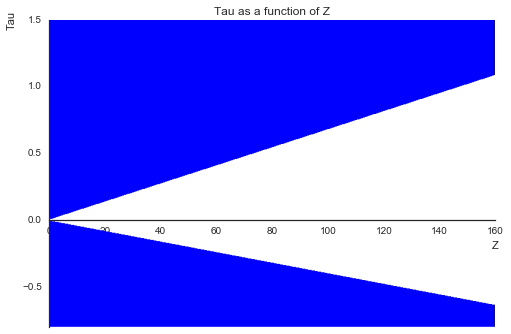

In [15]:
p2 = sym.plot_implicit(sym.Or(Z/147.5 < tau, Z/(147.5-400)> tau), (Z, 0, 160),(tau,-0.8,1.5),
                      title='Tau as a function of Z',
                      ylabel='Tau')


### Regime definition

Now we have all the elements to define a range of values for $N'$, $N''$ and $\tau_v$:

(1) Linear profiles that increase with depth:

$$0 \le N'$$.


(2) A maximum, minimum or inflection point above 400 m given an $N'$:

$$\frac{\hat{N'}}{2Hs}\lt {\hat{N''}} \,and \,  \frac{\hat{N'}}{2(Hs-400)}\gt {\hat{N''}}$$. 

Using these bounds, the regime of values of $\tau/Z$ is:

$$ \frac{1}{Hs-400} \gt \frac{\tau}{Z}$$, or  $$\frac{\tau}{Z} \gt \frac{1}{Hs}$$.

For our value of Hs, 

$$ -0.004 \gt \frac{\tau}{Z}$$, or  $$\frac{\tau}{Z} \gt 0.007$$.





N1=0.1000, N2min=-1.198e-03, Tau/Z=-2.396e-02 
 N1=0.1000, N2max=1.339e-03, Tau/Z=2.678e-02 
 
N1=0.0500, N2min=-1.099e-03, Tau/Z=-4.396e-02 
 N1=0.0500, N2max=1.169e-03, Tau/Z=4.678e-02 
 
N1=0.0200, N2min=-1.040e-03, Tau/Z=-1.040e-01 
 N1=0.0200, N2max=1.068e-03, Tau/Z=1.068e-01 
 
N1=0.0100, N2min=-1.020e-03, Tau/Z=-2.040e-01 
 N1=0.0100, N2max=1.034e-03, Tau/Z=2.068e-01 
 
N1=0.0050, N2min=-1.010e-03, Tau/Z=-4.040e-01 
 N1=0.0050, N2max=1.017e-03, Tau/Z=4.068e-01 
 
N1=0.0010, N2min=-1.002e-03, Tau/Z=-2.004e+00 
 N1=0.0010, N2max=1.003e-03, Tau/Z=2.007e+00 
 


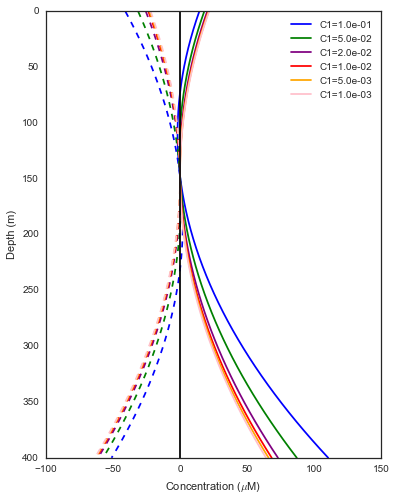

In [9]:
Hs = 147.5
No = 0

Nprime = np.array([0.1, 0.05,0.02,0.01,0.005,0.001])
z = np.linspace(0,400,50)

labels = ['C1=%1.1e'% Nprime[0],'C1=%1.1e'% Nprime[1],'C1=%1.1e'% Nprime[2],
          'C1=%1.1e'% Nprime[3],'C1=%1.1e'% Nprime[4],'C1=%1.1e'% Nprime[5]]
colors = ['blue','green','purple','red','orange','pink']
fig,ax = plt.subplots(1,1,figsize=(6,8))

for N1,lab,cc in zip(Nprime,labels,colors):
    N2min = (N1/(2*(Hs-400))-0.001)
    N2max = (N1/(2*Hs))+0.001
    
    Nmin = No + N1*(z-Hs) + N2min*(z-Hs)**2
    Nmax = No + N1*(z-Hs) + N2max*(z-Hs)**2
    
    ax.plot(Nmin,z, '--', color=cc)
    ax.plot(Nmax,z,'-', color=cc, label=lab)
    
    Tau_max = 2*N2max/(N1)
    Tau_min = 2*N2min/(N1)
    
    print('N1=%1.4f, N2min=%1.3e, Tau/Z=%1.3e \n N1=%1.4f, N2max=%1.3e, Tau/Z=%1.3e \n '
          %(N1,N2min,Tau_min,N1,N2max,Tau_max))

ax.set_xlabel('Concentration ($\mu$M)')
ax.set_ylabel('Depth (m)')
ax.invert_yaxis()
ax.axvline(0, color='k')
ax.legend(loc=0)

The linear profile I have used for all runs has:

$C'=(2.2\mu M-45.3\mu M)/(0m-1200m)=0.359 \mu M m^{-1}$

so, ${C'}=0.3 \mu M m^{-1}$


N1=0.0401, N2mean=-1.079e-03, Tau/Z=5.530e-02 



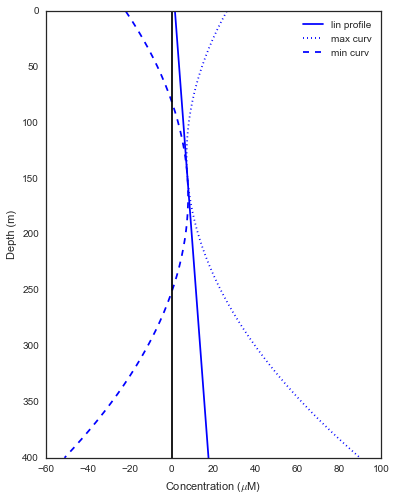

In [10]:
Hs = 147.5
No = 7.49
Nprime = np.array([0.3/No])
z = np.linspace(0,400,50)

labels = ['C1=0.047']
colors = ['blue','green','purple','red','orange','pink']
fig,ax = plt.subplots(1,1,figsize=(6,8))

for N1,lab,cc in zip(Nprime,labels,colors):
    N2min =(N1/(2*(Hs-400))) - 0.001
    N2max = (N1/(2*Hs))+0.001
    N2mean = (N2max-N2min)/2
    
    Nmean = No + N1*(z-Hs)
    Nmax = No + N1*(z-Hs) + N2max*(z-Hs)**2
    Nmin = No + N1*(z-Hs) + N2min*(z-Hs)**2
    
    ax.plot(Nmean,z,'-', color=cc, label='lin profile')
    ax.plot(Nmax,z,':', color=cc, label='max curv')
    ax.plot(Nmin,z,'--', color=cc, label='min curv')
    
    Tau_mean = 2*N2mean/(N1)
    
    print('N1=%1.4f, N2mean=%1.3e, Tau/Z=%1.3e \n'
          %(N1,N2min,Tau_mean))

ax.set_xlabel('Concentration ($\mu$M)')
ax.set_ylabel('Depth (m)')
ax.invert_yaxis()
ax.axvline(0, color='k')
ax.legend(loc=0)